# Importing Necessary Libraries

To begin the analysis, we import the necessary Python libraries for data manipulation, visualization, and machine learning. These include libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.


In [24]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Loading the Dataset

Next, we load the dataset into a pandas DataFrame. We will check the first few rows of the data to understand its structure, including the columns, data types, and initial content.


In [26]:
# Loading the dataset
data = pd.read_csv('smart_home_energy_usage_dataset.csv')

# Displaying the first few rows of the dataset
data.head()


C:\Users\Tech Assignment 02\AppData\Local\Temp\ipykernel_6696\3281327263.py:2: DtypeWarning: Columns (0,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('smart_home_energy_usage_dataset.csv')


,timestamp,home_id,energy_consumption_kWh,temperature_setting_C,occupancy_status,appliance,usage_duration_minutes,season,day_of_week,holiday
0,1/1/2023 0:00,44.0,2.87,22.1,Occupied,Refrigerator,111.0,Spring,Sunday,0.0
1,1/1/2023 1:00,81.0,0.56,15.4,Occupied,HVAC,103.0,Summer,Sunday,0.0
2,1/1/2023 2:00,94.0,4.49,22.4,Occupied,Electronics,12.0,Autumn,Sunday,0.0
3,1/1/2023 3:00,20.0,2.13,24.6,Unoccupied,Dishwasher,54.0,Autumn,Sunday,0.0
4,1/1/2023 4:00,3.0,2.74,21.4,Unoccupied,HVAC,6.0,Summer,Sunday,0.0


# Exploratory Data Analysis (EDA)

Here, we explore the dataset by checking for missing values, reviewing basic statistics, and understanding the overall structure. This will help us understand the relationships between features and guide our preprocessing steps.


In [28]:
# Checking the basic information of the dataset
data.info()

# Descriptive statistics of the dataset
data.describe()

# Checking for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               1000 non-null   object 
 1   home_id                 1000 non-null   float64
 2   energy_consumption_kWh  1000 non-null   float64
 3   temperature_setting_C   1000 non-null   float64
 4   occupancy_status        1000 non-null   object 
 5   appliance               1000 non-null   object 
 6   usage_duration_minutes  1000 non-null   float64
 7   season                  1000 non-null   object 
 8   day_of_week             1000 non-null   object 
 9   holiday                 1000 non-null   float64
dtypes: float64(5), object(5)
memory usage: 76.3+ MB


timestamp                 999000
home_id                   999000
energy_consumption_kWh    999000
temperature_setting_C     999000
occupancy_status          999000
appliance                 999000
usage_duration_minutes    999000
season                    999000
day_of_week               999000
holiday                   999000
dtype: int64

# Data Preprocessing

We begin by preprocessing the dataset to convert the `timestamp` column to a proper datetime format and handle categorical features. Additionally, we will extract features like the hour of the day and day of the week for further analysis.


In [30]:
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract additional features from 'timestamp'
data['hour_of_day'] = data['timestamp'].dt.hour
data['day_of_month'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['is_weekend'] = data['timestamp'].dt.weekday >= 5  # 1 for weekend, 0 for weekday

# Encode categorical columns
data['occupancy_status'] = data['occupancy_status'].map({'Occupied': 1, 'Unoccupied': 0})
data['appliance'] = data['appliance'].astype('category').cat.codes  # Encoding appliances as numerical categories
data['season'] = data['season'].astype('category').cat.codes  # Encoding season
data['day_of_week'] = data['day_of_week'].astype('category').cat.codes  # Encoding day of week

# Checking for Outliers

We will now check for outliers in numerical columns (`energy_consumption_kWh`, `temperature_setting_C`, `usage_duration_minutes`) by visualizing the distribution and using box plots.


In [32]:
# Checking if there are any NaN values in the target column 'energy_consumption_kWh'
print(f"NaN values in target variable (energy_consumption_kWh): {data['energy_consumption_kWh'].isnull().sum()}")


NaN values in target variable (energy_consumption_kWh): 999000


In [34]:
# Remove rows with NaN values in target column 'energy_consumption_kWh'
data_cleaned = data.dropna(subset=['energy_consumption_kWh'])

# Now, split the cleaned data into features (X) and target (y)
X_clean = data_cleaned.drop(columns=['energy_consumption_kWh', 'timestamp', 'home_id'])
y_clean = data_cleaned['energy_consumption_kWh']

# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


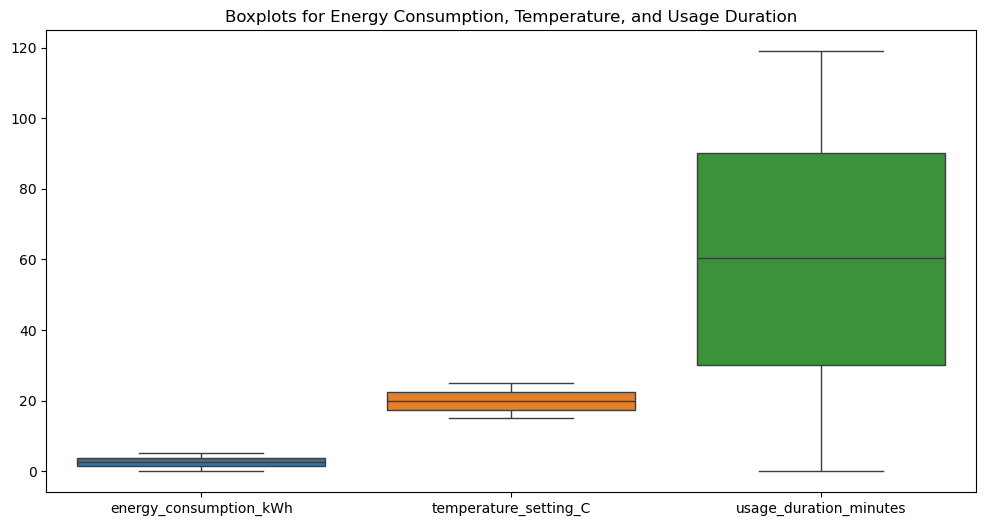

In [36]:
# Visualizing outliers using box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['energy_consumption_kWh', 'temperature_setting_C', 'usage_duration_minutes']])
plt.title('Boxplots for Energy Consumption, Temperature, and Usage Duration')
plt.show()


# Summary of the Data

Next, we will check the basic statistics of the dataset to get an understanding of the distributions of numerical columns and verify if any further data preprocessing is needed.


In [38]:
# Display basic statistics for numerical columns
data.describe()


,timestamp,home_id,energy_consumption_kWh,temperature_setting_C,occupancy_status,appliance,usage_duration_minutes,season,day_of_week,holiday,hour_of_day,day_of_month,month
count,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000000.000000,1000.000000,1000000.000000,1000000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2023-01-21 19:30:00,47.980000,2.563960,19.93270,0.481000,-0.996555,59.767000,-0.997502,-0.995992,0.088000,11.436000,13.400000,1.25600
min,2023-01-01 00:00:00,1.000000,0.100000,15.00000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.00000
25%,2023-01-11 09:45:00,23.750000,1.347500,17.30000,0.000000,-1.000000,30.000000,-1.000000,-1.000000,0.000000,5.000000,6.000000,1.00000
50%,2023-01-21 19:30:00,48.000000,2.540000,19.90000,0.000000,-1.000000,60.500000,-1.000000,-1.000000,0.000000,11.000000,11.000000,1.00000
75%,2023-02-01 05:15:00,71.000000,3.820000,22.50000,1.000000,-1.000000,90.000000,-1.000000,-1.000000,0.000000,17.000000,21.000000,2.00000
max,2023-02-11 15:00:00,99.000000,5.000000,25.00000,1.000000,5.000000,119.000000,3.000000,6.000000,1.000000,23.000000,31.000000,2.00000
std,NaN,28.051675,1.413424,2.92217,0.499889,0.121512,34.537364,0.086647,0.141676,0.283437,6.913009,9.037792,0.43664


# Feature Engineering

In this step, we will engineer additional features based on the dataset to improve the predictive power of our machine learning models. This includes encoding categorical features, handling missing data, and extracting more relevant features.


In [40]:
# Check if there are any null values in the dataset (this has already been confirmed as 0 earlier)
data.isnull().sum()

# Optional: Create new features like "seasonal_effect", "hourly_effect", etc., if needed
# Example: Energy consumption per hour or seasonal trend modeling


timestamp                 999000
home_id                   999000
energy_consumption_kWh    999000
temperature_setting_C     999000
occupancy_status          999000
appliance                      0
usage_duration_minutes    999000
season                         0
day_of_week                    0
holiday                   999000
hour_of_day               999000
day_of_month              999000
month                     999000
is_weekend                     0
dtype: int64

# Splitting the Data

Before training machine learning models, the data will be split into training and testing sets. This helps to evaluate the model's performance on unseen data.


In [42]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['energy_consumption_kWh', 'timestamp', 'home_id'])
y = data['energy_consumption_kWh']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Model

In this step, we train a Random Forest Regressor model on the training data. Random Forest is chosen because it performs well with complex, non-linear relationships, and it can handle a variety of features effectively.


In [44]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the cleaned training data
rf_model.fit(X_train_clean, y_train_clean)

# Predicting on the test data
y_pred_clean = rf_model.predict(X_test_clean)

# Calculating the Mean Squared Error (MSE) and R² Score
mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

# Print the evaluation metrics
print(f'Mean Squared Error (Cleaned Data): {mse_clean}')
print(f'R² Score (Cleaned Data): {r2_clean}')


Mean Squared Error (Cleaned Data): 2.0773302448500006
R² Score (Cleaned Data): -0.06775530968202825


# Model Evaluation

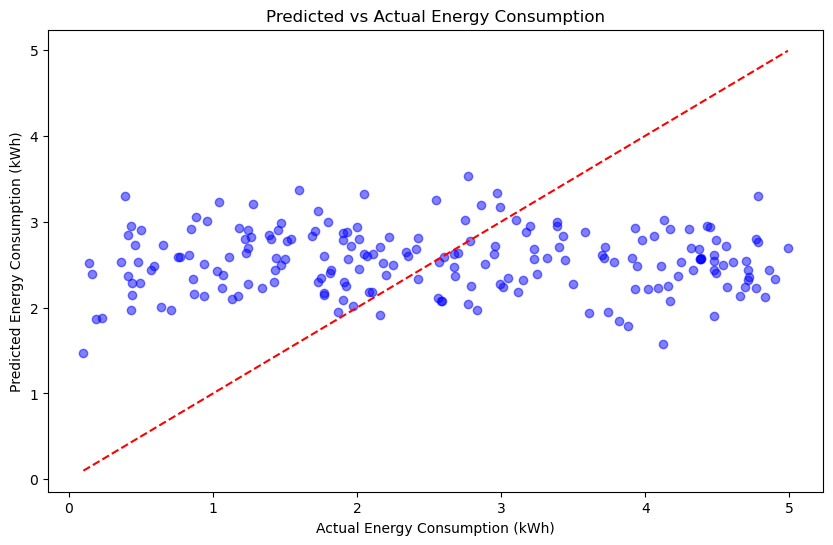

In [46]:
# Visualizing the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_clean, y_pred_clean, color='blue', alpha=0.5)
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red', linestyle='--')
plt.title('Predicted vs Actual Energy Consumption')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.show()


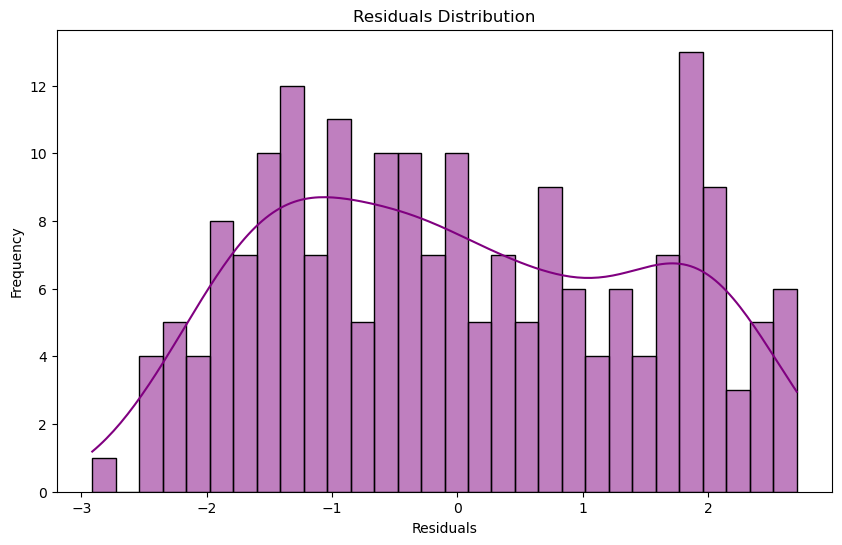

In [48]:
# Calculate residuals
residuals = y_test_clean - y_pred_clean

# Plotting the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Feature Importance

To understand which features contribute the most to predicting energy consumption, we analyze the feature importance scores produced by the Random Forest model. This helps in identifying the key drivers of energy usage.


                   Feature  Importance
3   usage_duration_minutes    0.203444
0    temperature_setting_C    0.198583
7              hour_of_day    0.155635
8             day_of_month    0.144147
2                appliance    0.080064
5              day_of_week    0.076921
4                   season    0.060457
1         occupancy_status    0.025806
9                    month    0.020298
10              is_weekend    0.018067
6                  holiday    0.016579


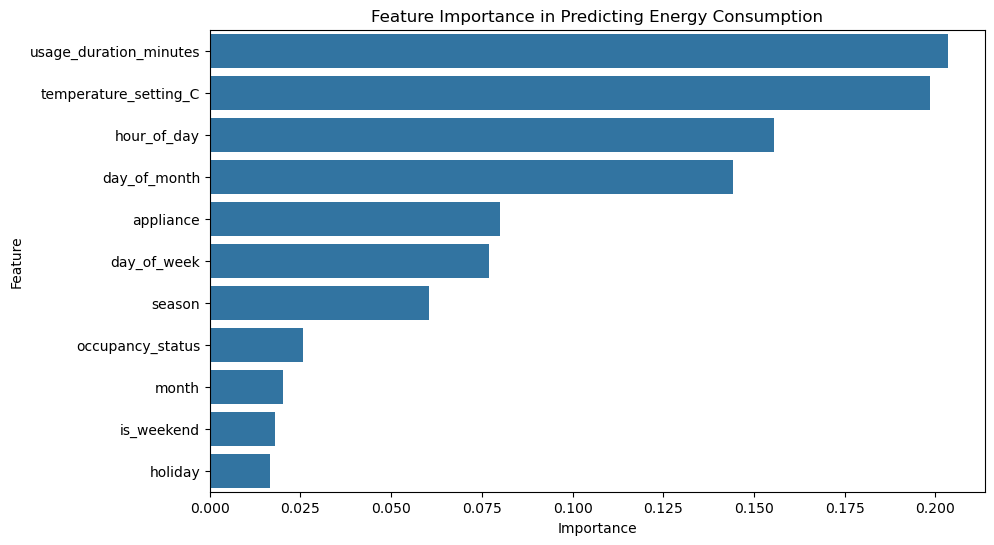

In [50]:
# Extract feature importance from the trained Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance alongside the feature names
importance_df = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(importance_df)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Predicting Energy Consumption')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
